In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!
import plot_3D, auxiliars, salve_doc, sphere, sample_random

## Criando o dado a priori

In [2]:
acquisition =  {'nx': 100,
                  'ny': 100,
                  'xmin': -10000,
                  'xmax': 10000,
                  'ymin': -10000,
                  'ymax': 10000,
                  'z': -100.0,
                  'color': '.r'}

cood_bounds = {'xmax': 250.0,
                'xmin': 40.0,
                'ymax': 100.0,
                'ymin': 0.0,
                'zlim': 150,
                'z_min': 100,
                'n': 5}

mag_bounds = {'inclmax': -20.0,
                'inclmin': 15.0,
                'declmax': 20.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 1.0,
                'homogeneo': True,
                'n': 5}

In [3]:
coodX, coodY, coodZ = sample_random.sample_random_coordinated(**cood_bounds)

incl, decl, mag = sample_random.sample_random_mag(**mag_bounds)

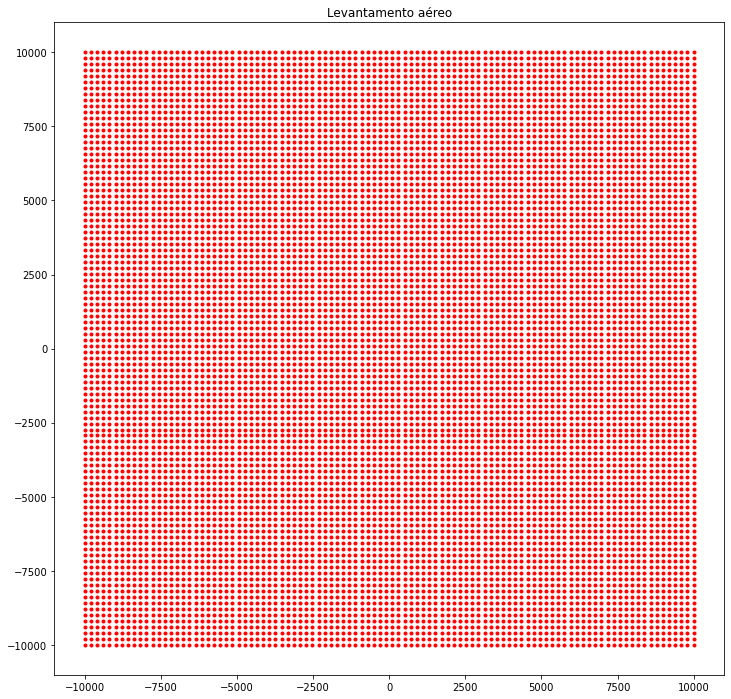

In [4]:
x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

In [5]:
balls_mag = {'incl': incl,
               'decl': decl,
               'mag': mag,
               'n': 5,
               'Xref': X,
               'Yref': Y,
               'Zref': Z,
               'I': 30.0,
               'D': 50.0,
               'coodX': coodX,
               'coodY': coodY,
               'coodZ': coodZ,
               'raio': 100.0}

tfa_n_bolinhas = sample_random.tfa_n_dots(**balls_mag)

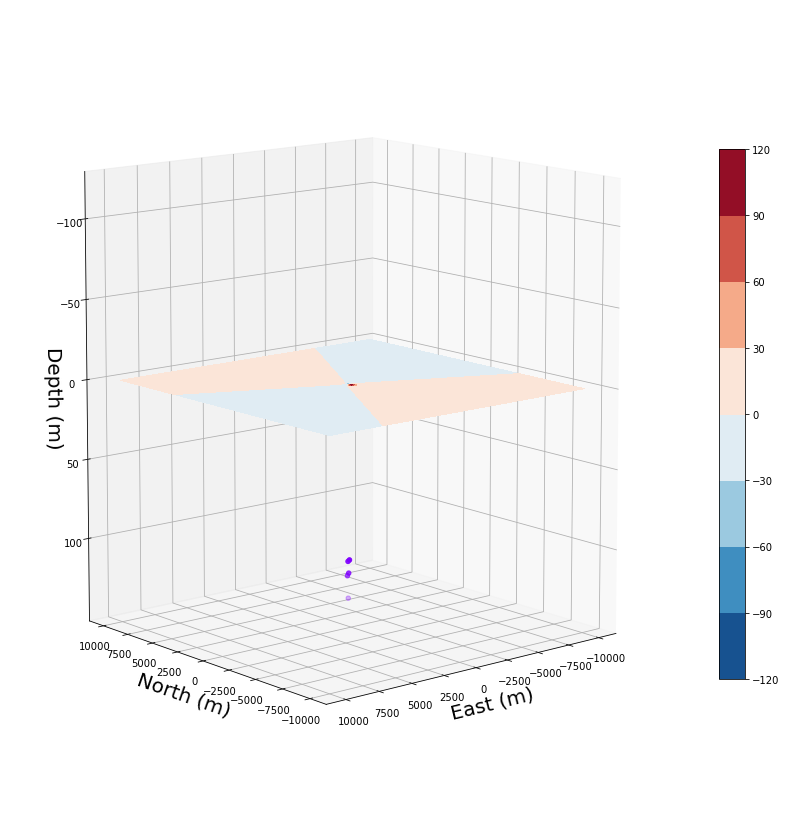

In [6]:
plot_3D.modelo_anomalia_3D(Y, X, tfa_n_bolinhas, coodY, coodX, coodZ, mag)

## Criando a população:

In [7]:
def create_population(xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, n_pop,
                      homogeneo):
    """
    Função com o objetivo de criar uma população com n indivíduos randômicos, que estaram de acordo com os parâmetros
    escolhidos.

    :param xmax: O valor máximo da coordenada X.
    :param ymax: O valor máximo da coordenada Y.
    :param zlim: O valor máximo da coordenada Z.
    :param xmin: O valor minímo da coordenada X.
    :param ymin: O valor minímo da coordenada Y.
    :param z_min: O valor minímo da coordenada Z.
    :param n_pop: número de indivíduos desejados na população.
    :param n_dip: número de dipolos desejados para cada indivíduo.
    :param inclmax: Valor máximo da inclianção magnética.
    :param inclmin: Valor mínimo da inclianção magnética.
    :param declmax: Valor máximo da inclianção magnética.
    :param declmin: Valor mínimo da declianção magnética.
    :param magmax: Valor máximo da magnetização.
    :param magmin: Valor mínimo da magnetização.
    :param homogeneo: True para valores de magnetização iguais para as n bolinhas.
                      False é a opção default, onde os valores de magnetização é criada de forma randominca.

    :return dipolos_pop: Lista com n indivíduos/dipolos criados de forma randômica.
    """
    pop = []
    n_par = 6
    for j in range(n_pop):
        individuo = np.zeros((n_dip, n_par))
        coodX, coodY, coodZ  = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n_dip)
        incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, homogeneo)
        for i in range(n_dip):
            individuo[i][0], individuo[i][1], individuo[i][2], individuo[i][3], individuo[i][4], individuo[i][5] = coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]
        pop.append(individuo)

    return pop


In [8]:
population = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n_dip': 7,
                'n_pop': 100,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

coord = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 7
                }

magnetic = {    'n': 7,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }

In [9]:

#n_dip = 7 # Número de dipolos pertecentes a cada indivíduo
#n_pop = 10
#n_par = 6

'''
pop = []
for j in range(n_pop):
    individuo = np.zeros((n_dip, n_par))
    coodX, coodY, coodZ = sample_random.sample_random_coordinated(**coord)
    incl, decl, mag = sample_random.sample_random_mag(**magnetic)
    for i in range(n_dip):
        individuo[i][0], individuo[i][1], individuo[i][2], individuo[i][3], individuo[i][4], individuo[i][5] = coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]
    pop.append(individuo)
    

print(pop)
print(type(pop))
'''


'\npop = []\nfor j in range(n_pop):\n    individuo = np.zeros((n_dip, n_par))\n    coodX, coodY, coodZ = sample_random.sample_random_coordinated(**coord)\n    incl, decl, mag = sample_random.sample_random_mag(**magnetic)\n    for i in range(n_dip):\n        individuo[i][0], individuo[i][1], individuo[i][2], individuo[i][3], individuo[i][4], individuo[i][5] = coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]\n    pop.append(individuo)\n    \n\nprint(pop)\nprint(type(pop))\n'

In [10]:
#print(pop[1])
#print(pop[1][0])
#print(pop[1][4][5])

In [11]:
pop = create_population(**population)

In [12]:
print(pop)
#print(len(pop))
#print(len(pop[0]))
#print(pop[0][0])
#print(pop[0][0][0])

[array([[ 6.04675e+03, -6.95216e+03,  4.98000e+00, -2.65200e+01,
         1.04130e+02,  5.50000e-01],
       [ 9.13557e+03, -5.76064e+03,  1.23230e+02, -2.65200e+01,
         1.04130e+02,  5.50000e-01],
       [ 5.67954e+03,  7.25222e+03,  1.01800e+02, -2.65200e+01,
         1.04130e+02,  5.50000e-01],
       [-2.27544e+03, -3.51220e+02,  5.00000e-02, -2.65200e+01,
         1.04130e+02,  5.50000e-01],
       [ 9.79350e+02,  6.37722e+03,  2.53500e+01, -2.65200e+01,
         1.04130e+02,  5.50000e-01],
       [ 3.08476e+03, -1.37335e+03,  4.28600e+01, -2.65200e+01,
         1.04130e+02,  5.50000e-01],
       [-3.18080e+02, -4.97516e+03,  1.02310e+02, -2.65200e+01,
         1.04130e+02,  5.50000e-01]]), array([[-5.40843e+03, -2.86697e+03,  2.52400e+01, -9.62000e+00,
         6.61900e+01,  1.11000e+00],
       [ 4.48371e+03,  2.27660e+02,  8.58000e+01, -9.62000e+00,
         6.61900e+01,  1.11000e+00],
       [ 1.16140e+03,  2.81430e+02,  3.83500e+01, -9.62000e+00,
         6.61900e+01,  1

## Calculando o Fitness

In [13]:
def fit_value(X, Y, Z, pop, tfa_n_bolinhas):
    list_sphere = []
    list_mag = []
    list_incl = []
    list_decl = []
    fit_cada = []

    for i in range(len(pop)):
        list_sphere.append((pop[i][0], pop[i][1], pop[i][2], 100.0))
        list_mag.append(pop[i][5])
        list_incl.append(pop[i][3])
        list_decl.append((pop[i][4]))
    
        tfa_cada = sphere.sphere_tfa(X,Y,Z,list_sphere[i],list_mag[i],30.0,50.0,list_incl[i],list_decl[i])
    
        fit = sample_random.f_difference(tfa_n_bolinhas, tfa_cada)
        fit_cada.append(float("{0:.2f}".format((fit))))
    
    return fit_cada

#fit_cada = fit_value(X, Y, Z, pop, tfa_n_bolinhas)
#print(fit_cada)

In [14]:
I = 30.0
D = 50.0
raio = 100.0

'''n_par = 4
list_sphere = []
list_mag = []
list_incl = []
list_decl = []
fit_cada = []
coodx = []
coody = []
coodz = []
incl = []
decl = []
mag = []'''
fit_cada = []

for i in range(len(pop)):
    coodx = []
    coody = []
    coodz = []
    incl = []
    decl = []
    mag = []
    for j in range(len(pop[0])):
        coodx.append(pop[i][j][0])
        coody.append(pop[i][j][1])
        coodz.append(pop[i][j][2])#, pop[i][j][1], pop[i][j][2], 100.0))
        mag.append(pop[i][j][5])
        incl.append(pop[i][j][3])
        decl.append(pop[i][j][4])
    
    tfa_dip = sample_random.tfa_n_dots(incl,decl,mag,len(pop[0]),X,Y,Z,I, D, coodx, coody, coodz, raio)
    fit = sample_random.f_difference(tfa_n_bolinhas, tfa_dip)
    fit_cada.append(float("{0:.2f}".format((fit))))
    '''list_sphere.append(sphere)
    list_mag.append(mag)
    list_incl.append(incl)
    list_decl.append(decl)'''
    
    #tfa_cada = sphere.sphere_tfa(X,Y,Z,list_sphere[i],list_mag[i],I,D,list_incl[i],list_decl[i])
    #fit = sample_random.f_difference(tfa_n_bolinhas, tfa_cada)
    #fit_cada.append(float("{0:.2f}".format((fit))))
    
    
print(mag)
print(pop[0][0][5])
#print(fit_cada)

[2.08, 2.08, 2.08, 2.08, 2.08, 2.08, 2.08]
0.55


## Método de seleção - Torneio

In [15]:
def tournament_selection(pop, fit_cada):
    pop_1 = pop.copy()
    chosen = []
    capture_select = []
    if int(0.2*len(pop)) < 2:
        print(f'Por favor faça uma população com mais de 10 indivíduos')
    else:
        for i in range(int(0.2*len(pop))):
#---------------------------- Escolhidos para o torneio ---------------------------------#
            index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2*len(pop)))))        
            capture = [index_select[i], fit_cada[index_select[i]]]
            capture_select.append(capture)
#---------------------------- Vencedor do torneio ---------------------------------#
            escolhido = pop_1[min(capture_select)[0]]
#------------------ Retirada do vencedor da população artificial ------------------------#
            del(pop_1[min(capture_select)[0]])
#---------------------------- Vencedores do torneio ---------------------------------#
            chosen.append(escolhido)
    
    return chosen

pais_torneio = tournament_selection(pop, fit_cada)

In [16]:
print(pais_torneio)
print(len(pais_torneio))

[array([[ 1.04020e+03,  5.79919e+03,  4.54500e+01,  6.93000e+00,
        -2.22000e+00,  4.79000e+00],
       [ 6.13407e+03,  7.99000e+02,  1.40000e-01,  6.93000e+00,
        -2.22000e+00,  4.79000e+00],
       [ 1.46659e+03,  7.10566e+03,  8.28100e+01,  6.93000e+00,
        -2.22000e+00,  4.79000e+00],
       [-8.75199e+03,  4.73054e+03,  1.16580e+02,  6.93000e+00,
        -2.22000e+00,  4.79000e+00],
       [-1.25758e+03, -6.22780e+03,  5.86100e+01,  6.93000e+00,
        -2.22000e+00,  4.79000e+00],
       [ 7.13801e+03,  3.89300e+03,  1.30000e-01,  6.93000e+00,
        -2.22000e+00,  4.79000e+00],
       [ 6.30117e+03,  1.91247e+03,  7.96500e+01,  6.93000e+00,
        -2.22000e+00,  4.79000e+00]]), array([[-4.10214e+03,  2.01433e+03,  6.93500e+01, -5.06200e+01,
        -1.38900e+01,  9.90000e-01],
       [-7.88392e+03, -2.59679e+03,  1.41530e+02, -5.06200e+01,
        -1.38900e+01,  9.90000e-01],
       [ 5.59708e+03,  7.30198e+03,  1.07170e+02, -5.06200e+01,
        -1.38900e+01,  9

## Crossover 

In [17]:
def crossover(pais_torneio):
    filhos = []
    n_filhos = int(len(pais_torneio)/2)
    pai = np.array(pais_torneio[0:n_filhos])
    mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])
    prob_pai = random.random()
    prob_mae = random.random()
    den = prob_mae + prob_pai

    for j in range(n_filhos):
        num = (prob_pai*pai[j] + prob_mae*mae[j])
        filho = num/den
        filhos.append(filho)
    
    
    return filhos

filho = crossover(pais_torneio)
print(filho)
print(len(filho))

[array([[ 2.58126778e+02, -4.48272300e+02,  3.91654867e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [ 4.90393120e+03, -1.05314468e+03,  4.19322196e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [-1.73053131e+03,  4.19697433e+03,  8.03300312e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [-6.32685286e+03,  1.39894926e+02,  1.04473131e+02,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [-5.75860923e+02, -1.49087390e+03,  9.38825013e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [ 2.11715430e+03,  1.33577666e+03,  4.30817392e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [ 6.13780567e+03,  1.12798696e+03,  5.53413541e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00]]), array([[ 1.56808377e+03,  6.02136195e+01,  7.99631111e+01,
        -4.21856302e+01,  5.79383143e+01,  1.14267695e+00],
       [-5.22412251e+03, -2.90192932e+03,  1.

## Mutação

In [18]:
'''sim sim... oq vc colocou é aleatório pra escolher o individuo pra
sofrer a mutação e dps escolher um parâmetro aleatório pra mutar dentro
desse max e min'''

#coodX[i], coodY[i], coodZ[i], incl[i], decl[i], mag[i]
filhos_mut = {'xmax': 10000.0,
                'xmin': -10000.0,
                'ymax': 10000.0,
                'ymin': -10000.0,
                'zlim': 150.0,
                'z_min': 0.0,
                'n': 1,
                'inclmax': -80.0,
                'inclmin': 15.0,
                'declmax': 172.0,
                'declmin': -15.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }


In [37]:
def mutacao(filho, xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo):
    
    prob_mut = 0.01
    for rand_mut, dipolo in enumerate(filho):
        rand_mut = random.random()
        if prob_mut > rand_mut:
            n_select = random.randint(0, (len(filho)-1))
            dip_select = random.randint(0, (len(filho[0])-1))
            param_select = random.randint(0, (len(filho[0][0])-1))
            if param_select <= 2:
                coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n)
                if param_select == 0:
                    filho[n_select][dip_select][param_select] = float(coodX[0])
                elif param_select == 1:
                    filho[n_select][dip_select][param_select] = float(coodY[0])
                elif param_select == 2:
                    filho[n_select][dip_select][param_select] = float(coodZ[0])
            else:
                incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo)
                if param_select == 3:
                    filho[n_select][dip_select][param_select] = float(incl[0])
                elif param_select == 4:
                    filho[n_select][param_select] = float(decl[0])
                elif param_select == 5:
                    filho[n_select][dip_select][param_select] = float(mag[0])
    
    return filho
                
filhos = mutacao(filho, **filhos_mut)      
print(filhos, len(filhos))
print(filhos[0])

[array([[ 2.58126778e+02, -4.48272300e+02,  3.91654867e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [ 4.90393120e+03, -1.05314468e+03,  4.19322196e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [-1.73053131e+03,  4.19697433e+03,  8.03300312e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [-6.32685286e+03,  1.39894926e+02,  1.04473131e+02,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [-5.75860923e+02, -1.49087390e+03,  9.38825013e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [ 2.11715430e+03,  1.33577666e+03,  4.30817392e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00],
       [ 6.13780567e+03,  1.12798696e+03,  5.53413541e+01,
        -5.68029060e+00,  1.55565484e+01,  4.21642984e+00]]), array([[ 1.56808377e+03,  6.02136195e+01,  7.99631111e+01,
        -4.21856302e+01,  5.79383143e+01,  1.14267695e+00],
       [-5.22412251e+03, -2.90192932e+03,  1.

## Calculando o fitness dos filhos

In [21]:
#fit_filhos = fit_value(X, Y, Z, filhos, tfa_n_bolinhas)
#print(fit_filhos)

## Reinserção dos filhos na população - Elitismo

In [22]:
'''def elitismo(pop, filhos, fit_cada):
    pop_fit = []
    n_fica = (len(pop) - len(filhos))

    for i in range(len(pop)):
        fit_pop = [pop[i], fit_cada[i]]
        pop_fit.append(fit_pop)
        sort_pop = sorted(pop_fit, key = lambda pop_fit : pop_fit[:][1])

    for i in range(len(sort_pop)):
        del(sort_pop[i][1])

    del(sort_pop[n_fica : len(pop)])
    for i in range(len(filhos)):
        new_individuo = filhos[i]
        sort_pop.append(new_individuo)
    
    return sort_pop

pop_final = elitismo(pop, filhos, fit_cada)
print(pop_final)
print(len(pop_final))
'''

'def elitismo(pop, filhos, fit_cada):\n    pop_fit = []\n    n_fica = (len(pop) - len(filhos))\n\n    for i in range(len(pop)):\n        fit_pop = [pop[i], fit_cada[i]]\n        pop_fit.append(fit_pop)\n        sort_pop = sorted(pop_fit, key = lambda pop_fit : pop_fit[:][1])\n\n    for i in range(len(sort_pop)):\n        del(sort_pop[i][1])\n\n    del(sort_pop[n_fica : len(pop)])\n    for i in range(len(filhos)):\n        new_individuo = filhos[i]\n        sort_pop.append(new_individuo)\n    \n    return sort_pop\n\npop_final = elitismo(pop, filhos, fit_cada)\nprint(pop_final)\nprint(len(pop_final))\n'

In [52]:
n_fica = (len(pop) - len(filhos))
df = pd.DataFrame(fit_cada)
x = df.sort_values(0, ascending=True)
piores = x.index[ n_fica: ]
for index, pos in enumerate(piores):
    pop[ pos ] = filhos[ index ]
    
pop

[array([[ 6.04675e+03, -6.95216e+03,  4.98000e+00, -2.65200e+01,
          1.04130e+02,  5.50000e-01],
        [ 9.13557e+03, -5.76064e+03,  1.23230e+02, -2.65200e+01,
          1.04130e+02,  5.50000e-01],
        [ 5.67954e+03,  7.25222e+03,  1.01800e+02, -2.65200e+01,
          1.04130e+02,  5.50000e-01],
        [-2.27544e+03, -3.51220e+02,  5.00000e-02, -2.65200e+01,
          1.04130e+02,  5.50000e-01],
        [ 9.79350e+02,  6.37722e+03,  2.53500e+01, -2.65200e+01,
          1.04130e+02,  5.50000e-01],
        [ 3.08476e+03, -1.37335e+03,  4.28600e+01, -2.65200e+01,
          1.04130e+02,  5.50000e-01],
        [-3.18080e+02, -4.97516e+03,  1.02310e+02, -2.65200e+01,
          1.04130e+02,  5.50000e-01]]),
 array([[-5.40843e+03, -2.86697e+03,  2.52400e+01, -9.62000e+00,
          6.61900e+01,  1.11000e+00],
        [ 4.48371e+03,  2.27660e+02,  8.58000e+01, -9.62000e+00,
          6.61900e+01,  1.11000e+00],
        [ 1.16140e+03,  2.81430e+02,  3.83500e+01, -9.62000e+00,
      

In [ ]:
'''
population = create_population()
print(population[1][4])
print("População Inicial: {}".format(population))
print("\n")
for i in range(1000):
    population = selection_and_crossover(population)
    population = mutation(population)
print("População Final: {}".format(population))
'''



In [ ]:
'''populacao = create_population(**population)
print("População Inicial: {}".format(populacao))
print("\n")
for i in range(10000):
    fit_ = fit_value(X, Y, Z, populacao)
    pais_ = tournament_selection(populacao, fit_)
    filho_ = crossover(pais_)
    filho_ = mutacao(filho_, **filhos_mut)
    populacao = elitismo(populacao, filho_, fit_)

last_fit = fit_value(X, Y, Z, populacao)
print(f'Última geração tem como o menor fitness: {min(last_fit)}')
''' 

In [66]:
aa = np.zeros(2)
print(aa)

aa[0] = np.zeros((2,2))
print(aa)

[0. 0.]


ValueError: setting an array element with a sequence.